# Abstract: 
Correlating alcohol consumption per capita with land use (cropland per capita) and life expectancy at birth.

# Conclusions: 
There is a strong, positive correlation between alcohol consumption per capita and cropland use per capita among the sample size. Unfortunately, due to the small sample size (only 6 countries), there cannot be larger conclusions made.

There is a positive correlation between alcohol consumption per capita and life expectancy at birth. An outlier is South Africa, which has a low life expectancy but not a low alcohol consumption rate. The correlation is not as strong as the previous analysis, but the sample size is larger. While there is a positive correlation, there is also a rather large variance, which indicates there are also other contributing factors to life expectancy.

# [Technical Report at the bottom]

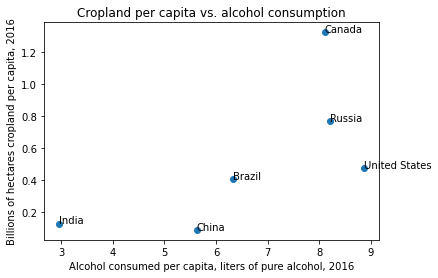

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

alcohol_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/SA_0000001400.csv"
cropland_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/cropland-per-person-over-the-long-term.csv"

alcohol_df = pd.read_csv(alcohol_path) 
alcohol_alltypes_df = alcohol_df.iloc[::5] #I tried to filter by "All types", but was unable to. This way works as well

cropland_df = pd.read_csv(cropland_path)
crop_mask = cropland_df[cropland_df['Year'] == 2016] # filtering based on value

crop_alc_common_country_list = ['Brazil','Canada','China','India','Russia','United States'] #these are the countries the data sets have in common

cropland_country_filter = crop_mask[crop_mask['Entity'].isin(crop_alc_common_country_list)] #filtering by countries common between cropland and alcohol

alcohol_alltypes_df = alcohol_alltypes_df.replace("United States of America","United States") #syncing terminology
alcohol_alltypes_df = alcohol_alltypes_df.replace("Russian Federation","Russia") #syncing terminology

alcohol_country_filter = alcohol_alltypes_df[alcohol_alltypes_df["Country"].isin(crop_alc_common_country_list)]

x = alcohol_country_filter['2016'] #data to plot
y = cropland_country_filter['Cropland per capita (HYDE (2017))'] #data to plot

# Plot shows the the two data sets plotted against each other
plt.figure(1)
plt.plot(x,y,'o')
plt.title('Cropland per capita vs. alcohol consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2016')
plt.ylabel('Billions of hectares cropland per capita, 2016')

for i in np.arange(0,6): #data labels for plot
    plt.text(alcohol_country_filter['2016'].values[i],cropland_country_filter['Cropland per capita (HYDE (2017))'].values[i],crop_alc_common_country_list[i])


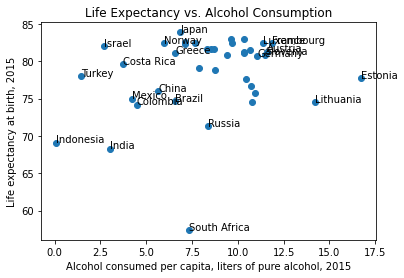

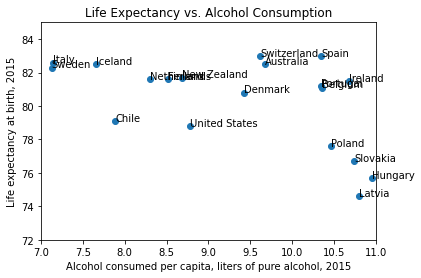

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

life_expectancy_path = "g:/My Drive/UMBC/Data Science/DATA 601/HW-1/life-expectancy-at-birth-oecd.csv"

life_exp_df = pd.read_csv(life_expectancy_path) #creating dataframe
life_exp_2015 = life_exp_df[life_exp_df['Year'] == 2015] #filtering on year 2015, as it's a common year between data sets

life_alc_common_country_list = list(set(alcohol_alltypes_df['Country']).intersection(set(life_exp_2015['Entity']))) #identifying common countries between alcohol and life, then converting to list
life_alc_common_country_list = sorted(life_alc_common_country_list) # sort common country list alphabetically

life_alc_country_filter = life_exp_2015[life_exp_2015['Entity'].isin(life_alc_common_country_list)] #filtering life expectance by countries common between life exp and alcohol
alc_life_country_filter = alcohol_alltypes_df[alcohol_alltypes_df['Country'].isin(life_alc_common_country_list)] #filtering alcohol consumption by countries common between life exp and alcohol

life_alc_merged = alc_life_country_filter.merge(life_exp_2015, left_on = 'Country', right_on = 'Entity')

#Plotting data
plt.figure(1)
y_life = life_alc_merged['Life Expectancy (OECD)']
x_life = life_alc_merged['2015']

plt.plot(x_life,y_life,'o')
plt.title('Life Expectancy vs. Alcohol Consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2015')
plt.ylabel('Life expectancy at birth, 2015')

# Labeling data
for i in np.arange(0,40): #data labels for plot
    if (life_alc_merged['2015'].values[i] < 7) or (life_alc_merged['2015'].values[i] >11):
        plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])
    elif life_alc_merged['Life Expectancy (OECD)'].values[i] < 72:
         plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])
        
#Now plotting the same thing, but zoomed in
plt.figure(2)
y_life = life_alc_merged['Life Expectancy (OECD)']
x_life = life_alc_merged['2015']

plt.plot(x_life,y_life,'o')
plt.title('Life Expectancy vs. Alcohol Consumption')
plt.xlabel('Alcohol consumed per capita, liters of pure alcohol, 2015')
plt.ylabel('Life expectancy at birth, 2015')
plt.xlim(7.0,11)
plt.ylim(72,85)
# Labeling data
for i in np.arange(0,40): #data labels for plot
    if 7 < life_alc_merged['2015'].values[i] < 11 and 72< life_alc_merged['Life Expectancy (OECD)'].values[i] < 85:
        plt.text(life_alc_merged['2015'].values[i],life_alc_merged['Life Expectancy (OECD)'].values[i],life_alc_merged['Country'].values[i])


# Technical Report
# Methodologies

A few different techniques were used, but the main one was taking data from multiple data sets, matching up each countries values, masking (if neccessary, depending on how the data was organized), and plotting them against each other. Data labels were added for presentation as well.

Some of the challenges I ran into were managing different variables in Python (something I'm sure I'll improve on), and some trial and error with manipulating pandas dataframes. For the alcohol_alltypes_df dataframe, I tried to filter on 'All types', but that wasn't working for me. It could have been due to a data type, but because 'All types' was every 5th row, I could filter them out by indexing instead. I also removed a top row from this .csv file in Excel. I probably could have figured out how to manipulate the .csv before importing it as a dataframe, but this proved to be pretty simple. One of our textbooks "Think Like a Data Scientist," encourages simple fixed for things like this.
Some methods I was not familiar with (.merge was very helpful, from the Slack channel), and I learned a fair amount from various online sources. 

# Conclusions and Future Analyses
There are positive correlations between alcohol consumption per capita and cropland use and life expectancy. The sample size was small for cropland use, so it would be useful to get more data to determine if this is part of a larger trend or now. The life expentancy shows a correlation, with one outlier (South Africa). There are other variables that effect this, as there is some variance, especially as seen by the zoomed in plot. Within certain bounds,  there could even be a parabolic correlation. It would be an interesting analysis to analyse additional factors, and identify which ones have the most influence.